# COVID-19 India Daily updates
> Tracking coronavirus total cases, deaths and new cases in India on a daily basis

- author: Vaibhav Mahapatra

In [1]:
#hide

## Import essential packages below

import pandas as pd
import numpy as np
import requests
import json
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib as mpl
from IPython.core.display import display,HTML
%matplotlib inline

In [2]:
#hide
url = 'https://api.covid19india.org/csv/latest/state_wise_daily.csv'
df = pd.read_csv(url)
df.shape

(487, 41)

In [3]:
#hide
df.tail(6)

,Date,Status,TT,AN,AP,AR,AS,BR,CH,CT,...,PB,RJ,SK,TN,TG,TR,UP,UT,WB,UN
481,21-Aug-20,Recovered,62858.0,106.0,8827.0,32.0,2476.0,3678.0,36.0,283.0,...,856.0,1306.0,7.0,5764.0,1781.0,86.0,5567.0,243.0,3082.0,0.0
482,21-Aug-20,Deceased,953.0,1.0,91.0,0.0,6.0,14.0,2.0,8.0,...,34.0,12.0,0.0,101.0,8.0,4.0,64.0,5.0,55.0,0.0
483,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
484,22-Aug-20,Confirmed,70067.0,61.0,10276.0,97.0,1560.0,2238.0,145.0,704.0,...,1316.0,1310.0,45.0,5980.0,2474.0,280.0,5217.0,483.0,3232.0,0.0
485,22-Aug-20,Recovered,59101.0,109.0,8593.0,103.0,2045.0,3531.0,45.0,372.0,...,409.0,1648.0,37.0,5603.0,1768.0,410.0,4638.0,345.0,3088.0,0.0
486,22-Aug-20,Deceased,918.0,0.0,97.0,0.0,7.0,13.0,0.0,10.0,...,45.0,11.0,0.0,80.0,7.0,1.0,70.0,3.0,48.0,0.0


In [4]:
#hide
dt_today = df.iloc[-1][0]
dt_yday = df.iloc[-4][0]
dt_today, dt_yday

('22-Aug-20', nan)

In [5]:
#hide
df_today = df.groupby('Status').sum()
df_yday = df.iloc[:-3][:].groupby('Status').sum()

In [6]:
#hide
df_today

,TT,AN,AP,AR,AS,BR,CH,CT,DN,DD,...,PB,RJ,SK,TN,TG,TR,UP,UT,WB,UN
Status,,,,,,,,,,,,,,,,,,,,,
Confirmed,3042809.0,2804.0,345216.0,3223.0,89367.0,119909.0,2776.0,20214.0,2125.0,0.0,...,40643.0,69264.0,1394.0,373410.0,101355.0,8386.0,182456.0,14566.0,135596.0,0.0
Deceased,56857.0,32.0,3189.0,5.0,238.0,601.0,33.0,190.0,2.0,0.0,...,1036.0,944.0,3.0,6420.0,744.0,70.0,2867.0,195.0,2737.0,0.0
Recovered,2279893.0,1844.0,252638.0,2228.0,67642.0,95372.0,1471.0,12394.0,1702.0,0.0,...,24302.0,54144.0,872.0,313280.0,78735.0,6061.0,131295.0,10021.0,104959.0,0.0


In [7]:
#hide
df_yday.head()

,TT,AN,AP,AR,AS,BR,CH,CT,DN,DD,...,PB,RJ,SK,TN,TG,TR,UP,UT,WB,UN
Status,,,,,,,,,,,,,,,,,,,,,
Confirmed,2972742.0,2743.0,334940.0,3126.0,87807.0,117671.0,2631.0,19510.0,2085.0,0.0,...,39327.0,67954.0,1349.0,367430.0,98881.0,8106.0,177239.0,14083.0,132364.0,0.0
Deceased,55939.0,32.0,3092.0,5.0,231.0,588.0,33.0,180.0,2.0,0.0,...,991.0,933.0,3.0,6340.0,737.0,69.0,2797.0,192.0,2689.0,0.0
Recovered,2220792.0,1735.0,244045.0,2125.0,65597.0,91841.0,1426.0,12022.0,1652.0,0.0,...,23893.0,52496.0,835.0,307677.0,76967.0,5651.0,126657.0,9676.0,101871.0,0.0


In [8]:
#hide
summary = {
    'updated' : dt_today,
    'since' : dt_yday,
    'Cases' : df_today['TT'][0],
    'Deaths' : df_today['TT'][1],
    'Recovered' : df_today['TT'][2],
    'PCases' : df_yday['TT'][0],
    'PDeaths' : df_yday['TT'][1],
    'PRecovered': df_yday['TT'][2],
    'Cases (+)' : df_today['TT'][0] - df_yday['TT'][0],
    'Deaths (+)' : df_today['TT'][1] - df_yday['TT'][1],
    'Recovered (+)': df_today['TT'][2] - df_yday['TT'][2]
}

summary

{'updated': '22-Aug-20',
 'since': nan,
 'Cases': 3042809.0,
 'Deaths': 56857.0,
 'Recovered': 2279893.0,
 'PCases': 2972742.0,
 'PDeaths': 55939.0,
 'PRecovered': 2220792.0,
 'Cases (+)': 70067.0,
 'Deaths (+)': 918.0,
 'Recovered (+)': 59101.0}

In [9]:
#hide
overview = '''
<!-- #######  HTML!! #########-->
<h1 style="color: #5e9ca0; text-align: center;">India</h1>
<p style="text-align: center;">Last update: <strong>{update}</strong></p>
<p style="text-align: center;">Confirmed cases:</p>
<p style="text-align: center;font-size:24px;">{cases} (<span style="color: #ff0000;">+{new}</span>)</p>
<p style="text-align: center;">Confirmed deaths:</p>
<p style="text-align: center;font-size:24px;">{deaths} (<span style="color: #ff0000;">+{dnew}</span>)</p>
<p style="text-align: center;">Recovered cases:</p>
<p style="text-align: center;font-size:24px;">{recovered} (<span style="color: #00ff00;">+{rnew}</span>)</p>
'''

In [10]:
#hide_input
# Fill the above HTML with the information from the summary dictionary

update = summary['updated']
cases = summary['Cases']
new = summary['Cases (+)']
deaths = summary['Deaths']
dnew = summary['Deaths (+)']
recovered = summary['Recovered']
rnew = summary['Recovered (+)']

html = HTML(overview.format(update=update, cases=cases,new=new,deaths=deaths,dnew=dnew, recovered=recovered, rnew=rnew))

display(html)

In [11]:
#hide
df_cases = df[df['Status'] == 'Confirmed'].copy()
df_cases.drop(columns = ['Status'], inplace=True)
df_deaths = df[df['Status'] == 'Deceased'].copy()
df_deaths.drop(columns = ['Status'], inplace=True)
df_recovered = df[df['Status'] == 'Recovered'].copy()
df_recovered.drop(columns = ['Status'], inplace=True)

Plot for India:

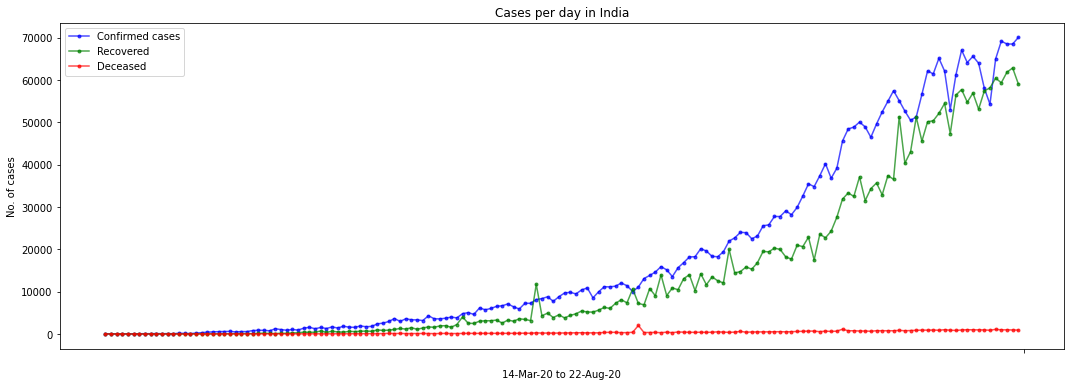

In [12]:
#hide_input
plt.figure(figsize = (18,6))
plt.plot(df_cases['Date'], df_cases['TT'],'.-', alpha=0.7, color='b', label='Confirmed cases')
plt.plot(df_recovered['Date'], df_recovered['TT'],'.-', alpha=0.7, color='g', label='Recovered')
plt.plot(df_deaths['Date'], df_deaths['TT'],'.-', alpha=0.7, color='r', label='Deceased')
plt.legend()
plt.title("Cases per day in India")
plt.xticks(ticks=' ')
plt.xlabel(f'{df_cases.iloc[0][0]} to {df_cases.iloc[-1][0]}')
plt.ylabel('No. of cases');

Plots for the states with highest number of cases:

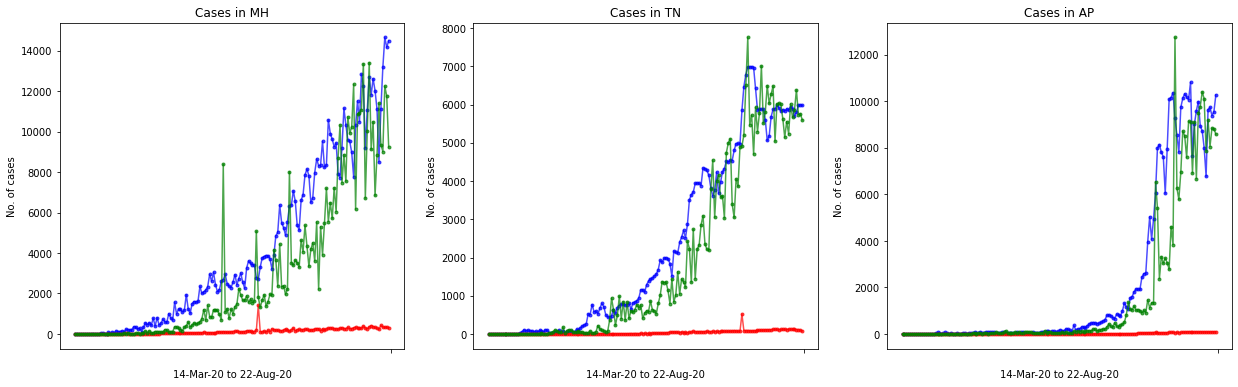

In [13]:
#hide_input
top_3 = sorted(df_cases.sum().values[1:], reverse=True)[1:4]
top3_states=[]
for i in top_3:
    top3_states.append(df_cases.sum()[df_cases.sum() == i].index)


fig, ax = plt.subplots(1,3,figsize = (21,6))
for i in range(3):
    state = top3_states[i].values[0]
    ax[i].plot(df_cases['Date'], df_cases[state],'.-', color='b', alpha=0.7)
    ax[i].plot(df_deaths['Date'], df_deaths[state],'.-', color='r', alpha=0.7)
    ax[i].plot(df_recovered['Date'], df_recovered[state],'.-', color='g', alpha=0.7)
    
    ax[i].set_title(f"Cases in {state}")
    ax[i].set_xticks(ticks=' ')
    ax[i].set_xlabel(f'{df_cases.iloc[0][0]} to {df_cases.iloc[-1][0]}')
    ax[i].set_ylabel('No. of cases');